In [ ]:
%pip install pandas
%pip install pandas_datareader
%pip install datetime
%pip install matplotlib
%pip install seaborn
%pip install pyarrow
%pip install fastparquet
%pip install yfinance
%pip install html5lib

In [42]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from matplotlib import style

plt.style.use('fivethirtyeight')


In [149]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 27)

sp500 = web.DataReader(['sp500'], 'fred', start, end)

In [124]:
sp500['daily_return'] = (SP500['sp500']/ SP500['sp500'].shift(1)) -1

#Drop all Not a number values using drop method.
sp500.dropna(inplace = True)

splast = sp500.tail(5)
print(splast)

              sp500  daily_return
DATE                             
2021-01-21  3853.07      0.000317
2021-01-22  3841.47     -0.003011
2021-01-25  3855.36      0.003616
2021-01-26  3849.62     -0.001489
2021-01-27  3750.77     -0.025678


<AxesSubplot: title={'center': 'S&P 500 daily returns'}, xlabel='DATE'>

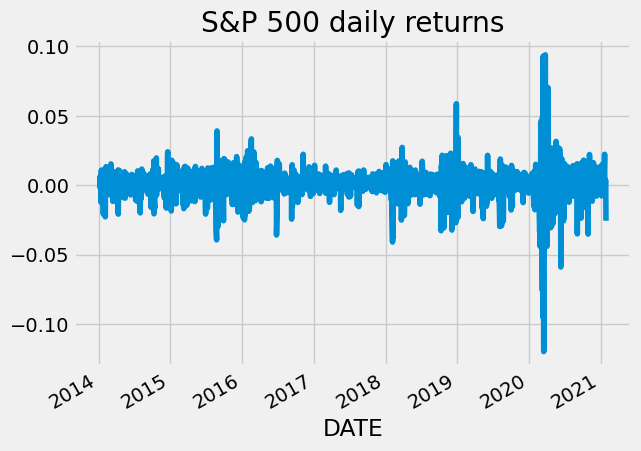

In [125]:
sp500['daily_return'].plot(title='S&P 500 daily returns')

<AxesSubplot: title={'center': 'S&P 500 Price'}, xlabel='DATE'>

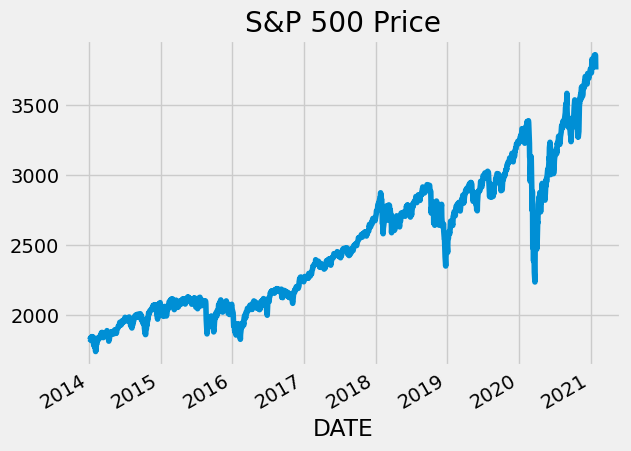

In [126]:
SP500['sp500'].plot(title='S&P 500 Price')

In [177]:

start = dt.datetime(2014, 1, 1)        
end = dt.datetime(2021, 10, 10)

tickers_list = ['AAPL', 'IBM',  'BA', 'AXP']

# Fetch the data
data_ind = yf.download(tickers_list, start, end)['Adj Close']

# Print first 5 rows of the data
print(data_ind)

[*********************100%***********************]  4 of 4 completed
                  AAPL         AXP          BA         IBM
Date                                                      
2014-01-02   17.415529   78.466026  116.807961  122.360886
2014-01-03   17.032990   78.720436  117.619888  123.092957
2014-01-06   17.125870   78.685341  118.295074  122.670845
2014-01-07   17.003387   78.387093  120.089897  125.117661
2014-01-08   17.111065   78.633347  120.354836  123.970108
...                ...         ...         ...         ...
2021-10-04  138.135513  170.026581  223.789993  129.534027
2021-10-05  140.091293  172.094543  224.419998  128.671143
2021-10-06  140.974869  170.755280  224.990005  127.961029
2021-10-07  142.255554  172.058365  226.479996  127.466637
2021-10-08  141.868378  172.907364  226.389999  128.734039

[1957 rows x 4 columns]


In [206]:
data_ind.fillna(0)
data_pct = data_ind.pct_change(periods=1).dropna()
print(data_pct)


                AAPL       AXP        BA       IBM
Date                                              
2014-01-03 -0.021965  0.003242  0.006951  0.005983
2014-01-06  0.005453 -0.000446  0.005740 -0.003429
2014-01-07 -0.007152 -0.003790  0.015172  0.019946
2014-01-08  0.006333  0.003142  0.002206 -0.009172
2014-01-09 -0.012770 -0.005928  0.009303 -0.003139
...              ...       ...       ...       ...
2021-10-04 -0.024606 -0.007359 -0.009779  0.005512
2021-10-05  0.014158  0.012163  0.002815 -0.006661
2021-10-06  0.006307 -0.007782  0.002540 -0.005519
2021-10-07  0.009084  0.007631  0.006622 -0.003864
2021-10-08 -0.002722  0.004934 -0.000397  0.009943

[1956 rows x 4 columns]


<AxesSubplot: >

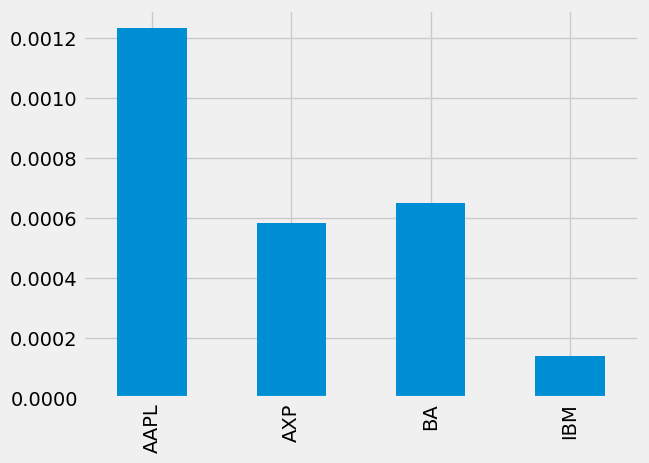

In [207]:
data_pct.mean()

data_pct.mean().plot.bar()

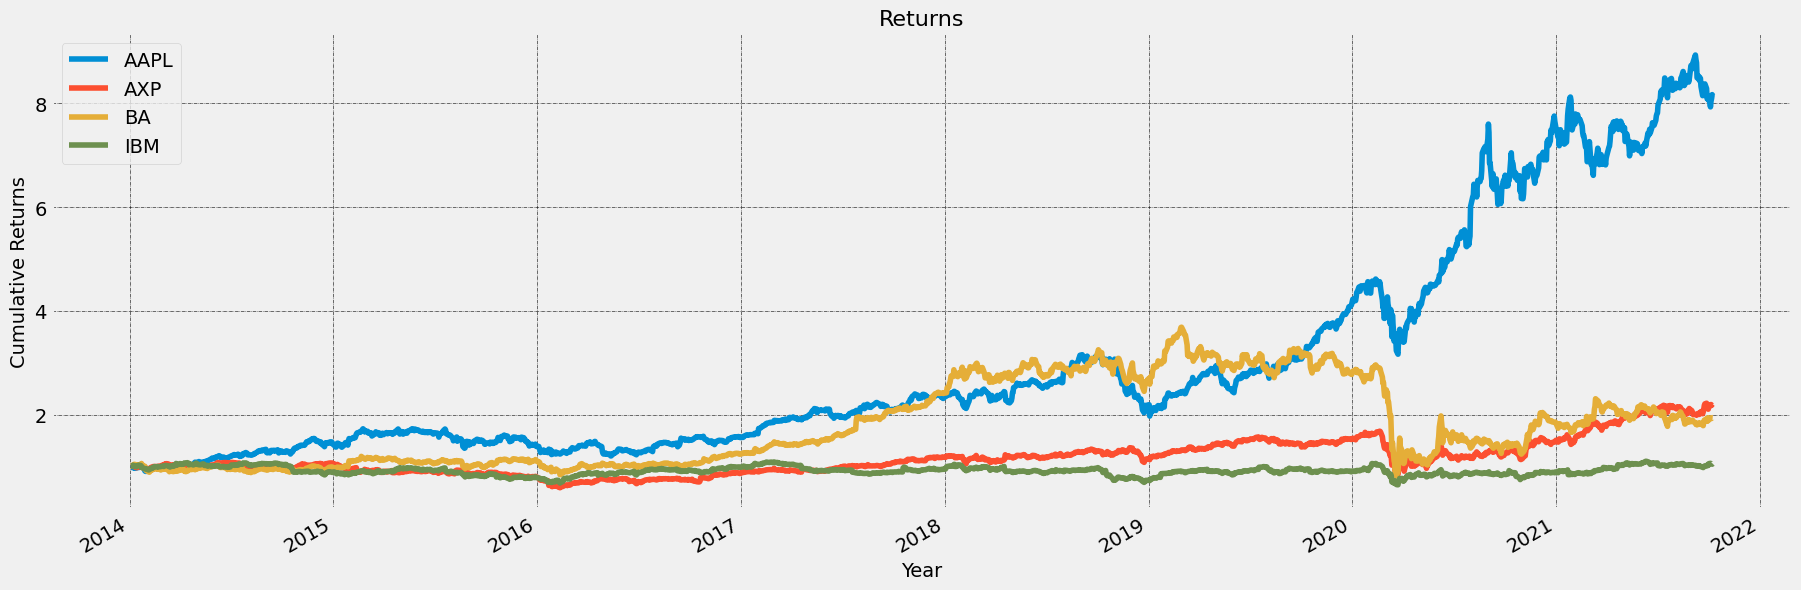

In [218]:
# Plot all the close prices
((data_ind.pct_change()+1).cumprod()).plot(figsize=(20, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.4)
plt.show()

In [187]:

gdp = wb.download(indicator='NY.GDP.MKTP.CD', country='US', start=2014, end=2021)
print(gdp)

                    NY.GDP.MKTP.CD
country       year                
United States 2021  22996100000000
              2020  20893743833000
              2019  21372572437000
              2018  20527156026000
              2017  19479620056000
              2016  18695110842000
              2015  18206020741000
              2014  17550680174000


In [204]:
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2021, 10, 10)

tickers_list = ['^GSPC', 'AAPL', 'IBM',  'BA', 'AXP']

# Fetch the data
data = yf.download(tickers_list, start, end)['Adj Close']

# Print first 5 rows of the data
print(data)

[*********************100%***********************]  5 of 5 completed
                  AAPL         AXP          BA         IBM        ^GSPC
Date                                                                   
2014-01-02   17.415535   78.466026  116.807953  122.360909  1831.979980
2014-01-03   17.032976   78.720421  117.619881  123.092949  1831.369995
2014-01-06   17.125868   78.685333  118.295082  122.670876  1826.770020
2014-01-07   17.003386   78.387077  120.089874  125.117683  1837.880005
2014-01-08   17.111074   78.633339  120.354836  123.970146  1837.489990
...                ...         ...         ...         ...          ...
2021-10-04  138.135513  170.026596  223.789993  129.534012  4300.459961
2021-10-05  140.091309  172.094543  224.419998  128.671143  4345.720215
2021-10-06  140.974869  170.755280  224.990005  127.961021  4363.549805
2021-10-07  142.255554  172.058380  226.479996  127.466644  4399.759766
2021-10-08  141.868362  172.907379  226.389999  128.734024  4391.33

[*********************100%***********************]  1 of 1 completed
Date
2014-01-02    1831.979980
2014-01-03    1831.369995
2014-01-06    1826.770020
2014-01-07    1837.880005
2014-01-08    1837.489990
                 ...     
2021-10-04    4300.459961
2021-10-05    4345.720215
2021-10-06    4363.549805
2021-10-07    4399.759766
2021-10-08    4391.339844
Name: Adj Close, Length: 1957, dtype: float64


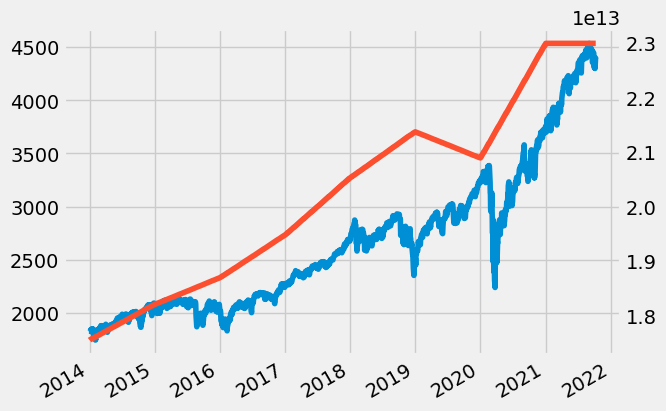

In [219]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import wb

gdp = wb.download(indicator='NY.GDP.MKTP.CD', country='US', start=2014, end=2021)
gdp = gdp.unstack().T.reset_index(0)
gdp.index = pd.to_datetime(gdp.index, format='%Y')

start = dt.datetime(2014, 1, 1)
end = dt.datetime(2021, 10, 10)

tickers_list = ['^GSPC']

# Fetch
sp500 = yf.download(tickers_list, start, end)['Adj Close']

# we print first 5 rows of the data
print(sp500)

data = sp500.to_frame().join(gdp, how='outer')
data = data.interpolate(method='linear')
ax = data['Adj Close'].plot()
ax = data['United States'].plot(ax=ax, secondary_y=True)
plt.show()

In [220]:
gdp = wb.download(indicator='NY.GDP.MKTP.CD', country=['US', 'GB', 'DK', 'DE', 'SE'], start=2014, end=2021)
gdp = gdp.unstack().T.reset_index(0)
gdp.index = pd.to_datetime(gdp.index, format='%Y')

start = dt.datetime(2014, 1, 1)
end = dt.datetime(2021, 10, 10)

tickers_list = ['^GSPC']

datasp = yf.download(tickers_list, start, end)['Adj Close']

data = datasp.to_frame().join(gdp, how='outer')
data = data.interpolate(method='linear')
print(data.corr(numeric_only = True))

[*********************100%***********************]  1 of 1 completed
                Adj Close   Denmark   Germany    Sweden  United Kingdom  \
Adj Close        1.000000  0.906974  0.865535  0.829739        0.585301   
Denmark          0.906974  1.000000  0.984185  0.932509        0.636006   
Germany          0.865535  0.984185  1.000000  0.887317        0.578817   
Sweden           0.829739  0.932509  0.887317  1.000000        0.775112   
United Kingdom   0.585301  0.636006  0.578817  0.775112        1.000000   
United States    0.935710  0.907312  0.898316  0.754083        0.424035   

                United States  
Adj Close            0.935710  
Denmark              0.907312  
Germany              0.898316  
Sweden               0.754083  
United Kingdom       0.424035  
United States        1.000000  
